# Trip Duration by customer characteristic

### Overview
This project is an expanatory analysis of Ford GoBike trip data.  We are looking at how trip duration differs based on age, start/end station, user type and gender

### Dataset
The Ford GoBike System data contains 183,412 trip records. Each trip record has 16 columns to provided detailed information from each trip
* Trip duration
* Start/end time
* Starting station id, name, lattitude & longitude
* Ending station id, name, lattitude & longitude
* Bike id
* User type
* Member birth year, gender
* Bike share for all

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# remove warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load dataset (ford go bike)
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# change datatype for "start_time" & "end_time" columns to datetime64
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [4]:
# change datatype for "bike_share_for_all_trip" column to boolean values
df.bike_share_for_all_trip = df.bike_share_for_all_trip == 'Yes'

### Trip Durations

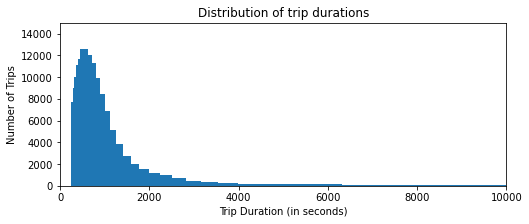

In [5]:
# plot the distribution of trip durations
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of trip durations')
plt.xlabel('Trip Duration (in seconds)')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 15000])
plt.show()

### Trip Duration by User Age

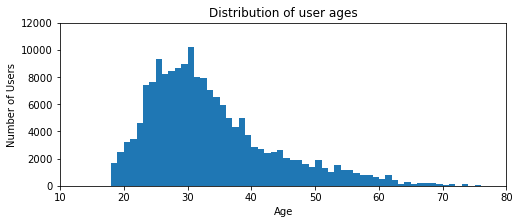

In [6]:
# Plotting the distribution of age per user
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 3])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of user ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

### Trip Duration by User Age

The majority of users fall betweent the ages of 20 & 40.  Usership declines as age increases. 

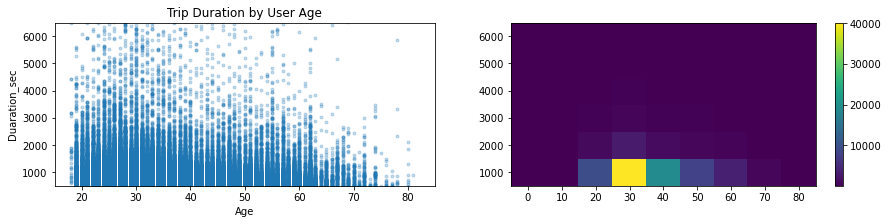

In [7]:
plt.figure(figsize=[15, 3])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([15, 85, 500, 6500])
plt.title('Trip Duration by User Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

### Trip Duration and Age by Gender

Age is the main indicator of duration.  for males & females, as the age of the user increases trip duration declines.  This is not as noticible with those who specify their gender as "other".  While older users use the service less, the correlation between distance and age is not as strong as with males & females. 

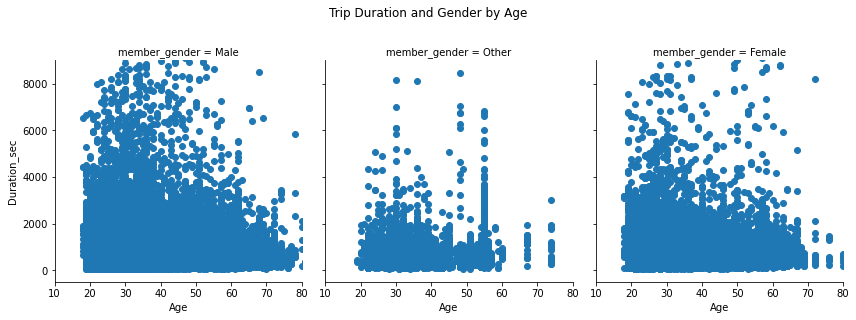

In [8]:
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 4,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration and Gender by Age', y = "1.1")

plt.show()

### Trip Duration and Age by User Type

Again age is the main indicator of duration.  For both user types the age of the user increases trip duration declines.
Subscribers look to ride for longer and include more older customers than customers.

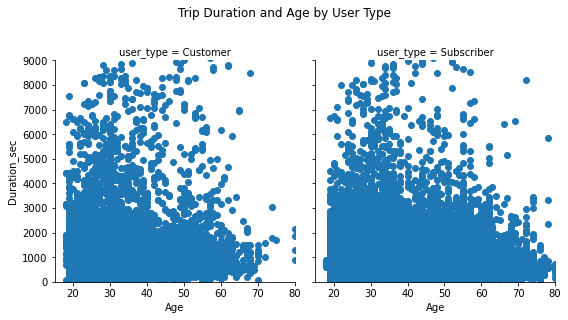

In [9]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 4,
                 xlim = [15, 80], ylim = [0, 9000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration and Age by User Type', y = "1.1")

plt.show()

In [27]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')